In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
#판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('multipleChoiceResponses.csv',
                 encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

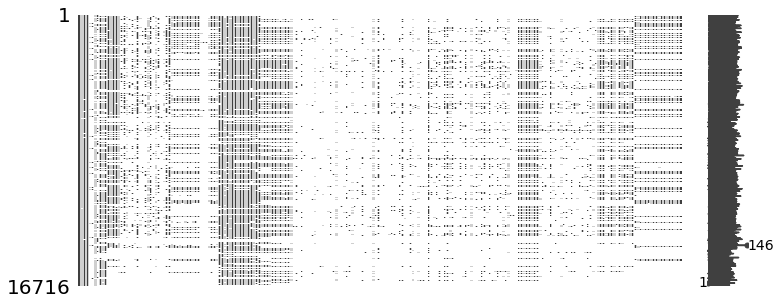

In [9]:
#missingnos는 Nan 데이터들에 대해 시각화를 해준다
#Nan 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

설문통계


<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

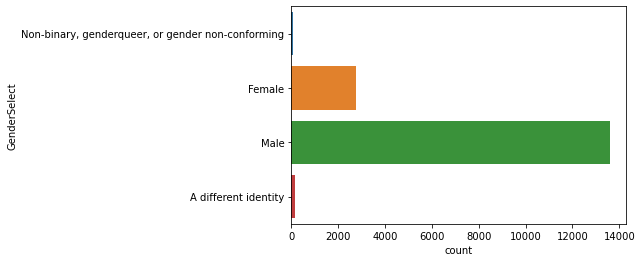

In [10]:
#성별
sns.countplot(y='GenderSelect', data=mcq)

In [11]:
#국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
#print(con_df)
#'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
#컬럼의 순서대로 응답 수 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
#index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
#우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다.
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [12]:
#연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

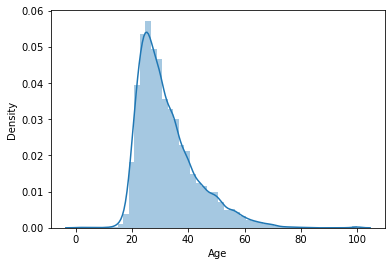

In [13]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'] )

학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

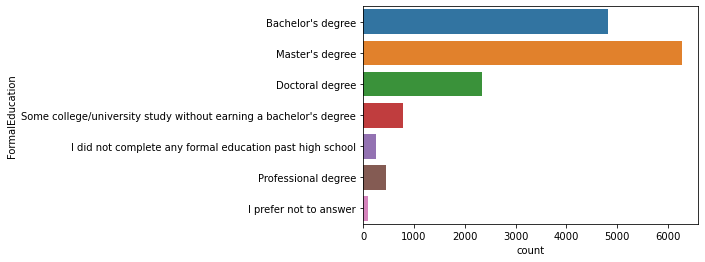

In [14]:
sns.countplot(y='FormalEducation', data=mcq)

전공

In [15]:
#value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다,
#normalize=True 옵션을 사용하면,
#해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

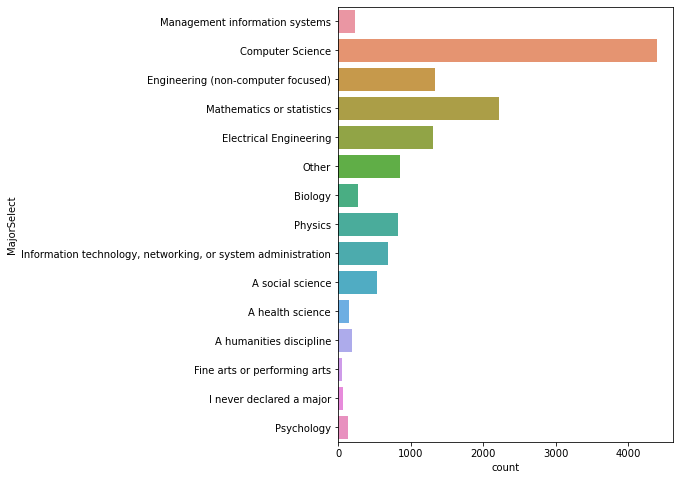

In [16]:
#재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

취업여부

In [17]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index= True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

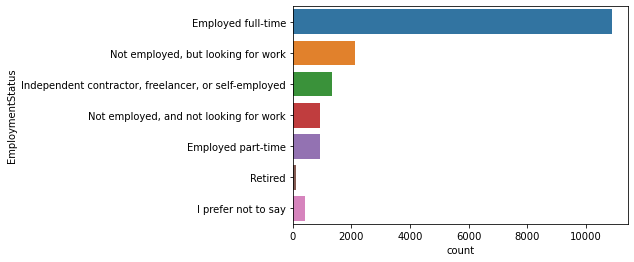

In [18]:
sns.countplot(y='EmploymentStatus', data=mcq)

프로그래밍 경험

<AxesSubplot:xlabel='count', ylabel='Tenure'>

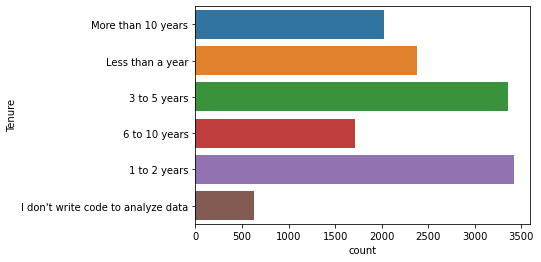

In [19]:
sns.countplot(data=mcq, y='Tenure')

The number of interviewees in Korea: 194


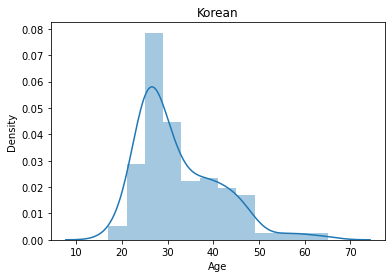

In [20]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]
print('The number of interviewees in Korea: ' + str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [21]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

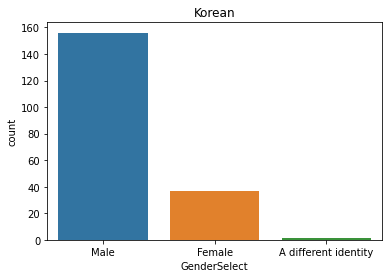

In [22]:
sns.countplot(x='GenderSelect', data= korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

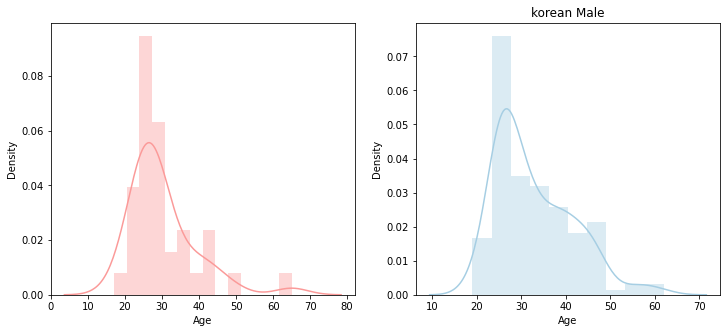

In [23]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')


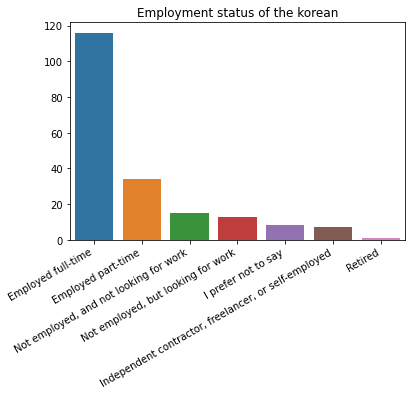

In [24]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

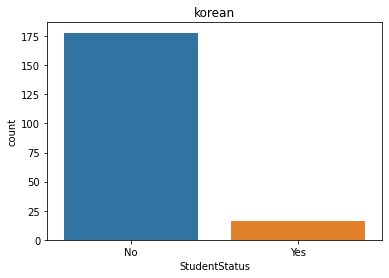

In [25]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

자주 묻는 질문 FAQ
-초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

In [26]:
mcq.columns[:100]

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType',
       'MLToolNextYearSelect', 'MLMethodNextYearSelect',
       'LanguageRecommendationSelect', 'PublicDatasetsSelect',
       'LearningPlatformSelect', 'LearningPlatformUsefulnessArxiv',
       'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessCollege',
       'LearningPlatformUsefulnessCompany',
       'LearningPlatformUsefulnessConferences',
       'LearningPlatformUsefulnessFriends', 'LearningPlatformUsefulnessKaggle',
       'LearningPlatformUsefulnessNewsletters',
       'LearningPlatformUsefulnessCommunities',
       'LearningPlatformUsefulnessDocumentation',
       'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects',
       'LearningPlatformUsefulnessPodcasts', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

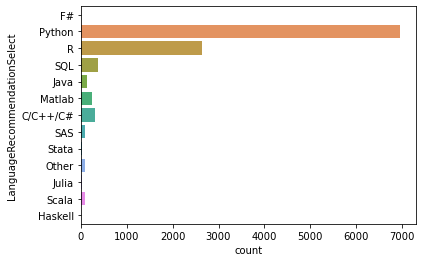

In [27]:
sns.countplot( data = mcq, y='LanguageRecommendationSelect')

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

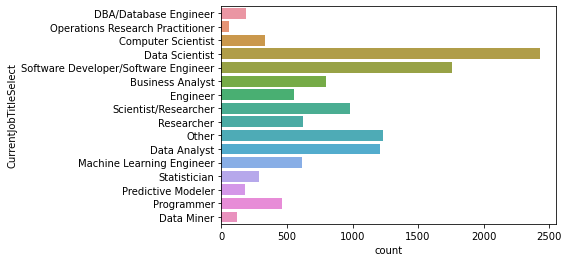

In [28]:
sns.countplot(data = mcq, y = 'CurrentJobTitleSelect')

In [29]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

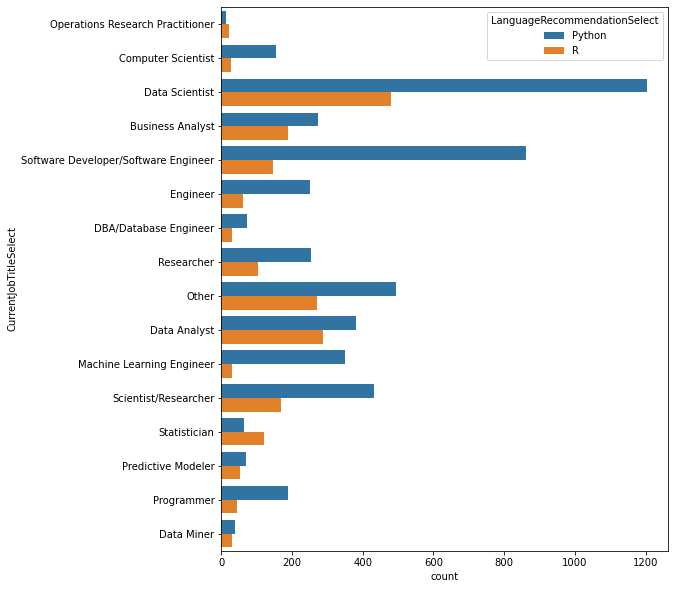

In [30]:
#Python 과 R을 사용하고 있는 현재 하고 있는 일에 대한 응답을 해준 사람 중
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect']== 'Python') | (mcq['LanguageRecommendationSelect']== 'R')
    )]
print(data.shape)
plt.figure(figsize = (8,10))
sns.countplot(data = data , y ='CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect'  )


2. 데이터 사이언스 분야에서 앞으로 가장 크게 주목받을 것은 무엇일까?

In [31]:
mcq.columns[:100]

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType',
       'MLToolNextYearSelect', 'MLMethodNextYearSelect',
       'LanguageRecommendationSelect', 'PublicDatasetsSelect',
       'LearningPlatformSelect', 'LearningPlatformUsefulnessArxiv',
       'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessCollege',
       'LearningPlatformUsefulnessCompany',
       'LearningPlatformUsefulnessConferences',
       'LearningPlatformUsefulnessFriends', 'LearningPlatformUsefulnessKaggle',
       'LearningPlatformUsefulnessNewsletters',
       'LearningPlatformUsefulnessCommunities',
       'LearningPlatformUsefulnessDocumentation',
       'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects',
       'LearningPlatformUsefulnessPodcasts', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook

In [32]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, 
                                        left_index = True, right_index = True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


In [33]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)

<AxesSubplot:xlabel='MLToolNextYearSelect'>

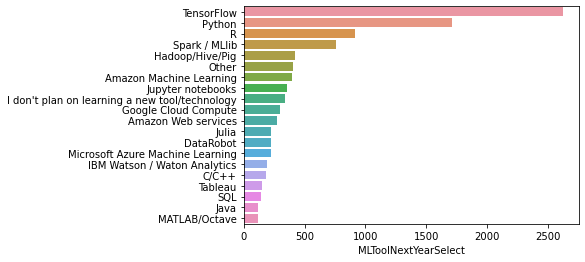

In [34]:
sns.barplot(x= data, y = data.index)

데이터 사이언스 방법 - Data Science Methods

In [35]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

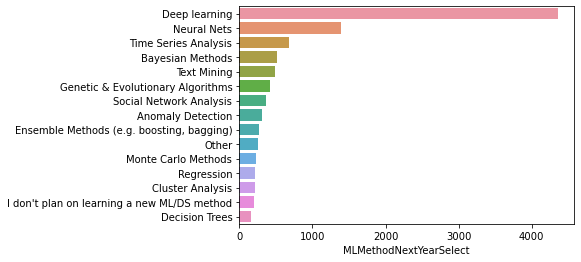

In [36]:
sns.barplot(y = data.index, x=data)

어디서 데이터 사이언스를 배워야 할까요?

In [37]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str')
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level = 1, drop = True)
s.name = 'platform'

<AxesSubplot:xlabel='platform'>

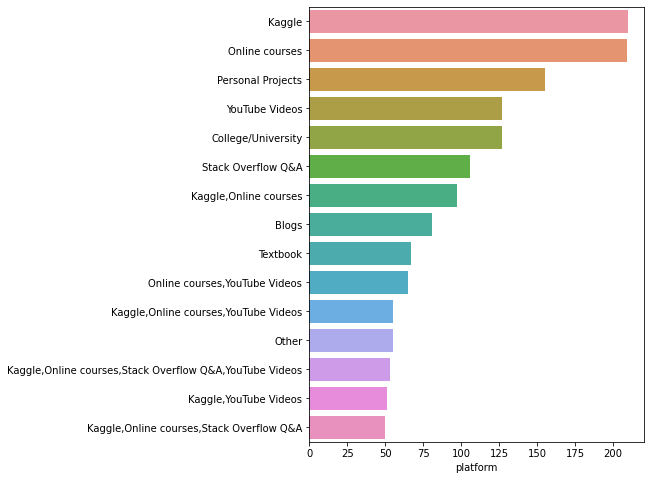

In [39]:
plt.figure(figsize = (6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(x = data, y = data.index)
#Kaggle이 응답자들 사이에서 가장 인기있는 학습 플랫폼이다.

In [40]:
mcq

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
mcq.columns[:100]

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType',
       'MLToolNextYearSelect', 'MLMethodNextYearSelect',
       'LanguageRecommendationSelect', 'PublicDatasetsSelect',
       'LearningPlatformSelect', 'LearningPlatformUsefulnessArxiv',
       'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessCollege',
       'LearningPlatformUsefulnessCompany',
       'LearningPlatformUsefulnessConferences',
       'LearningPlatformUsefulnessFriends', 'LearningPlatformUsefulnessKaggle',
       'LearningPlatformUsefulnessNewsletters',
       'LearningPlatformUsefulnessCommunities',
       'LearningPlatformUsefulnessDocumentation',
       'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects',
       'LearningPlatformUsefulnessPodcasts', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook

In [44]:
#설문 내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [46]:
use_features = [x for x in mcq.columns if x.find(
        'LearningPlatformUsefulness') != -1]
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

<AxesSubplot:>

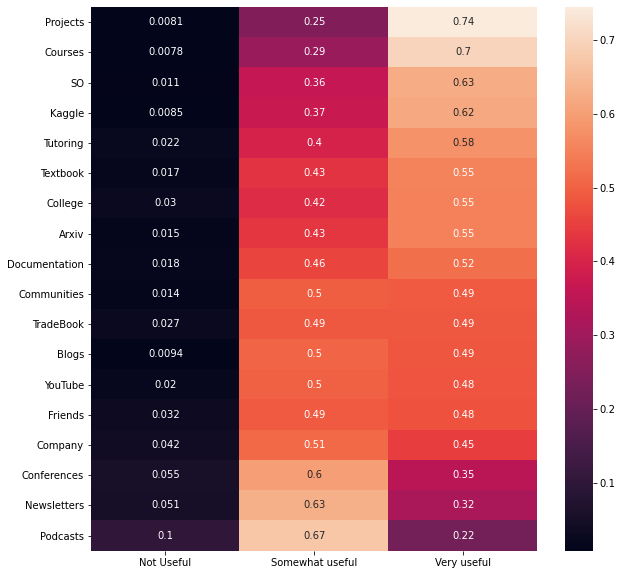

In [48]:
#학습 플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending = False)

# 학습 플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려보자.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

<AxesSubplot:title={'center':'Usefullness of Learning Platforms'}>

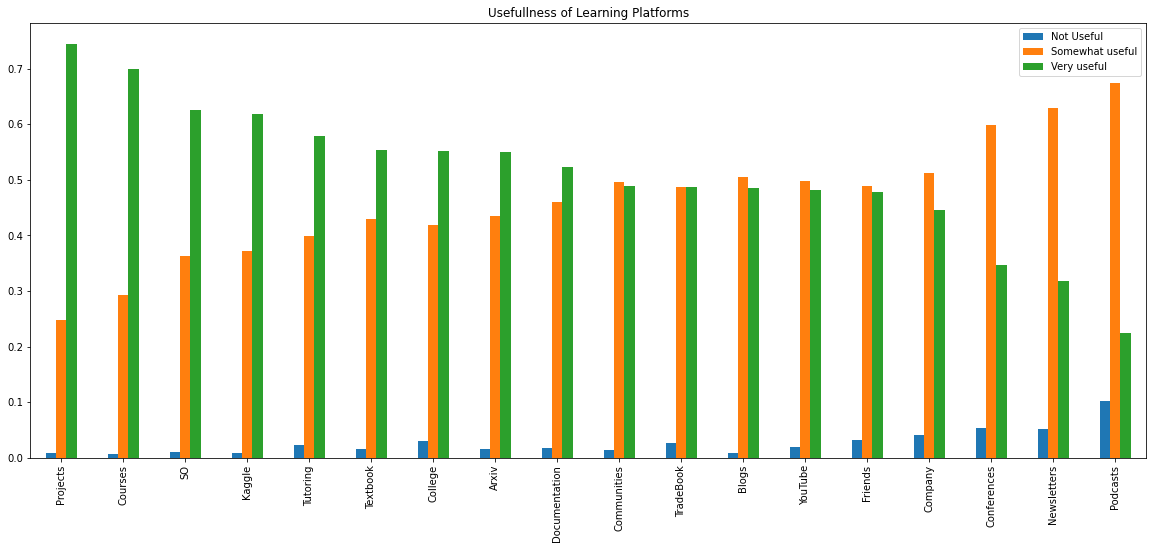

In [49]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
        title="Usefullness of Learning Platforms")

실제로 프로젝트를 해보는 것에 대한 74.7%의 응답자가 매용 유용하다고 표시했다.

In [50]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [51]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    
#파이타를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

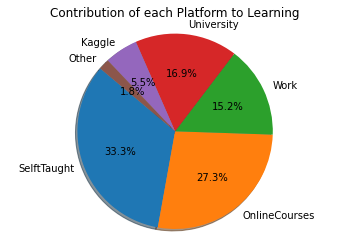

In [52]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels = cdf.index,
           autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()


개인프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답되었다.

데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [53]:
#설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [54]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [55]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
             pd.Series(x['HardwarePersonalProjectsSelect']),
             axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'


In [56]:
s = s[s != 'nan']

In [57]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?

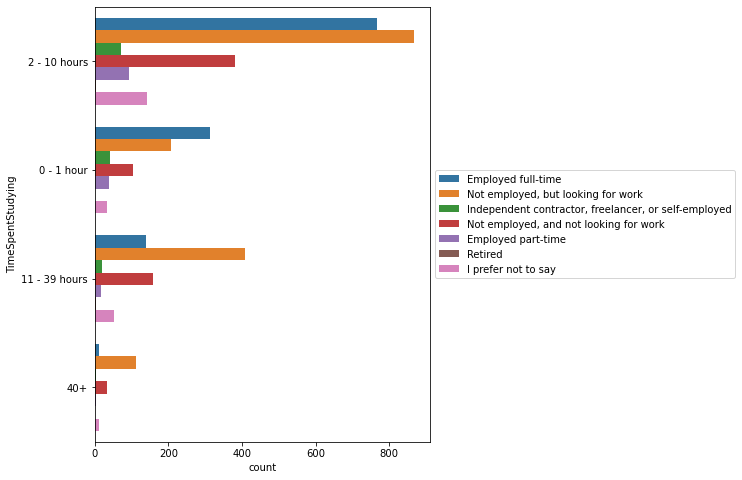

In [58]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
             data=mcq,
             hue='EmploymentStatus'
             ).legend(loc='center left',
                     bbox_to_anchor=(1, 0.5))